# LAB 4: BÀI THỰC HÀNH CHUẨN BỊ DỮ LIỆU


### PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

In [80]:
#1.Viết hàm load_data() để tải dữ liệu và hiển thị 10 dòng đầu tiên
import pandas as pd

def load_data(file_url):
    # Tải dữ liệu từ URL
    df = pd.read_csv(file_url)
    
    # Hiển thị 10 dòng đầu tiên
    print(df.head(10))
    return df

# Đọc dữ liệu từ link đã cung cấp
file_url = "https://github.com/AnhNguyenVLU/Data-Analytics-and-Deep-Learning/raw/main/TAI%20LIEU%20THAM%20KHAO%20LAB%20VA%20DATA/DuLieu/titanic_disaster.csv?plain=1"
df = load_data(file_url)









   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


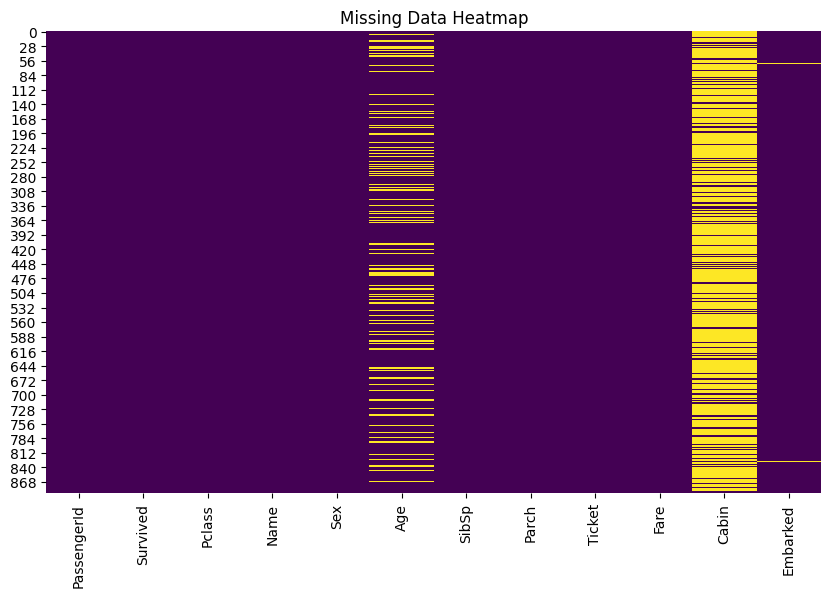

In [81]:
#2.Thống kê dữ liệu thiếu và trực quan hóa dữ liệu thiếu
#Sử dụng seaborn để trực quan hóa dữ liệu thiếu bằng heatmap.
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_missing_data(df):
    # In ra số lượng dữ liệu thiếu cho từng cột
    print(df.isnull().sum())
    
    # Vẽ Heatmap hiển thị dữ liệu thiếu
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Heatmap")
    plt.show()

# Trực quan hóa dữ liệu thiếu
visualize_missing_data(df)

In [82]:
#3.Xử lý tên cột Name, tách thành firstName và secondName
# Tách cột Name thành firstName và secondName
def process_name(df):
    if 'Name' in df.columns:
        # Tách cột 'Name' thành 'firstName' và 'secondName'
        df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)
        
        # Xóa cột 'Name'
        df.drop(columns=['Name'], inplace=True)
    return df

# Xử lý tên cột 'Name'
df = process_name(df)
print(df.head(10))


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   
5            6         0       3    male   NaN      0      0   
6            7         0       1    male  54.0      0      0   
7            8         0       3    male   2.0      3      1   
8            9         1       3  female  27.0      0      2   
9           10         1       2  female  14.0      1      0   

             Ticket     Fare Cabin Embarked  firstName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4    

In [83]:
#4.Rút gọn dữ liệu trong cột 'Sex' (male → M, female → F)
def process_sex(df):
    df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})
    return df

# Xử lý dữ liệu 'Sex'
df = process_sex(df)
print(df[['Sex']].head(10))

  Sex
0   M
1   F
2   F
3   F
4   M
5   M
6   M
7   M
8   F
9   F


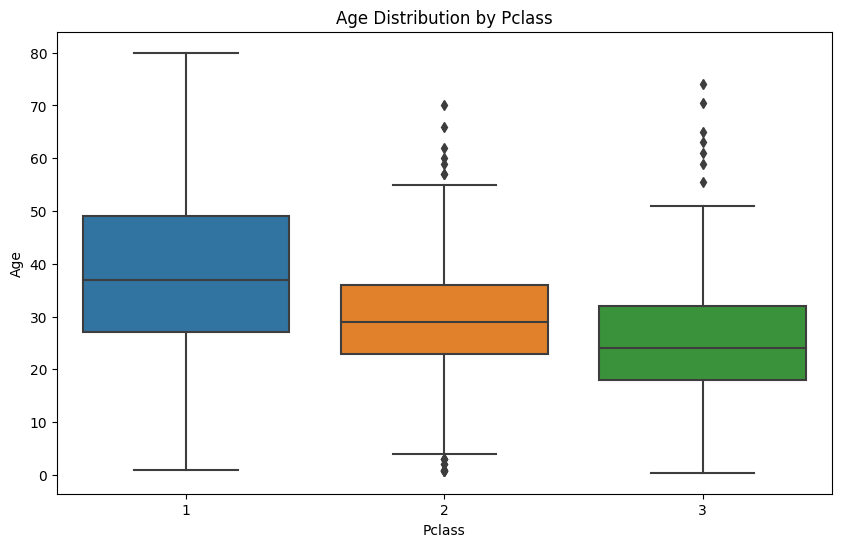

In [84]:
#5.Xử lý thiếu dữ liệu trong cột Age
#a.Vẽ biểu đồ Boxplot để xác định phân phối tuổi theo hạng hành khách.
# Vẽ Box plot để xem phân phối tuổi theo hạng vé (Pclass)
def visualize_age_by_pclass(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pclass', y='Age', data=df)
    plt.title('Age Distribution by Pclass')
    plt.show()

# Trực quan hóa phân phối tuổi theo hạng vé
visualize_age_by_pclass(df)
#b. Thay thế dữ liệu thiếu
# Thay thế dữ liệu thiếu Age bằng giá trị trung bình theo Pclass
def fill_missing_age(df):
    # Thay thế giá trị Age bị thiếu bằng giá trị trung bình của từng Pclass
    df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
    return df

# Xử lý dữ liệu thiếu cột 'Age'
df = fill_missing_age(df)


In [85]:
#6.Tạo biến số Agegroup theo các khoảng tuổi
def create_agegroup(df):
    bins = [0, 12, 18, 60, 100]
    labels = ['Kid', 'Teen', 'Adult', 'Older']
    df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
    return df

# Tạo cột 'Agegroup'
df = create_agegroup(df)
print(df[['Age', 'Agegroup']].head(10))


        Age Agegroup
0  22.00000    Adult
1  38.00000    Adult
2  26.00000    Adult
3  35.00000    Adult
4  35.00000    Adult
5  25.14062    Adult
6  54.00000    Adult
7   2.00000      Kid
8  27.00000    Adult
9  14.00000     Teen


In [86]:
#7.Thêm đặc trưng namePrefix từ secondName
def add_name_prefix(df):
    df['namePrefix'] = df['secondName'].str.extract(r'(Mr|Mrs|Miss|Master)', expand=False)
    return df

# Thêm danh xưng (prefix)
df = add_name_prefix(df)
print(df[['secondName', 'namePrefix']].head(10))


                                    secondName namePrefix
0                              Mr. Owen Harris         Mr
1   Mrs. John Bradley (Florence Briggs Thayer)         Mr
2                                  Miss. Laina       Miss
3           Mrs. Jacques Heath (Lily May Peel)         Mr
4                            Mr. William Henry         Mr
5                                    Mr. James         Mr
6                                Mr. Timothy J         Mr
7                        Master. Gosta Leonard     Master
8     Mrs. Oscar W (Elisabeth Vilhelmina Berg)         Mr
9                  Mrs. Nicholas (Adele Achem)         Mr


In [87]:
#8.Khai thác đặc trưng familySize
def add_family_size(df):
    df['familySize'] = df['SibSp'] + df['Parch'] + 1  # +1 là bản thân hành khách
    return df

# Thêm cột 'familySize'
df = add_family_size(df)
print(df[['SibSp', 'Parch', 'familySize']].head(10))

   SibSp  Parch  familySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
5      0      0           1
6      0      0           1
7      3      1           5
8      0      2           3
9      1      0           2


In [88]:
#9.Tạo đặc trưng Alone
def add_alone(df):
    df['Alone'] = df['familySize'].apply(lambda x: 1 if x == 1 else 0)
    return df

# Thêm cột 'Alone'
df = add_alone(df)
print(df[['familySize', 'Alone']].head(10))

   familySize  Alone
0           2      0
1           2      0
2           1      1
3           2      0
4           1      1
5           1      1
6           1      1
7           5      0
8           3      0
9           2      0


In [89]:
#10.Tách loại cabin typeCabin
def add_type_cabin(df):
    df['typeCabin'] = df['Cabin'].str[0].fillna('Unknown')  # Lấy ký tự đầu tiên từ 'Cabin'
    return df

# Thêm cột 'typeCabin'
df = add_type_cabin(df)
print(df[['Cabin', 'typeCabin']].head(10))

  Cabin typeCabin
0   NaN   Unknown
1   C85         C
2   NaN   Unknown
3  C123         C
4   NaN   Unknown
5   NaN   Unknown
6   E46         E
7   NaN   Unknown
8   NaN   Unknown
9   NaN   Unknown


In [92]:
#11.Loại bỏ dữ liệu trùng lặp giữa train.csv và test.csv
def remove_duplicates(train_df, test_df):
    # Giữ lại dữ liệu từ tập huấn luyện
    merged_df = pd.concat([train_df, test_df]).drop_duplicates(subset=['PassengerId'], keep='first')
    return merged_df
# Giả sử bạn có dữ liệu train_df và test_df
# df = remove_duplicates(train_df, test_df)

### PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

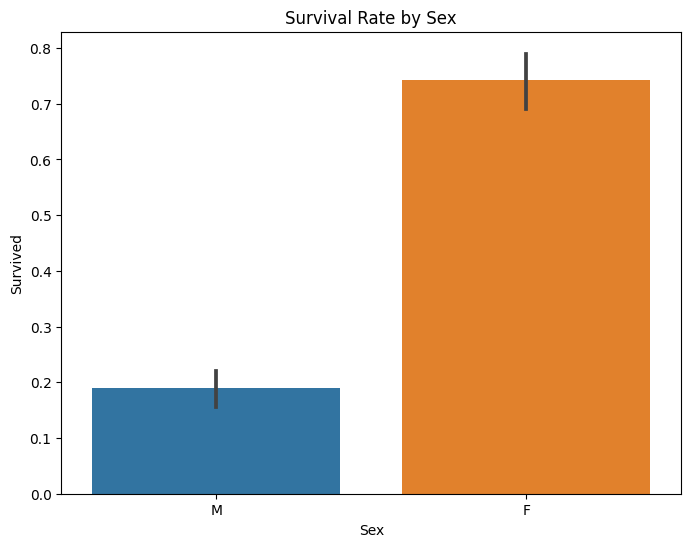

In [93]:
#12.Trực quan tỷ lệ sống sót theo giới tính
def visualize_survival_by_sex(df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Sex', y='Survived', data=df)
    plt.title('Survival Rate by Sex')
    plt.show()

# Trực quan tỷ lệ sống sót theo giới tính
visualize_survival_by_sex(df)


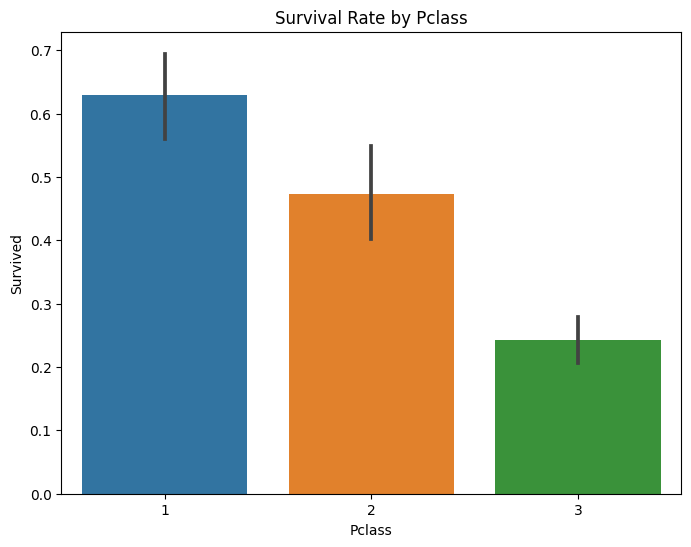

In [94]:
#13.Trực quan tỷ lệ sống sót theo phân hạng hành khách (Pclass)
def visualize_survival_by_pclass(df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Pclass', y='Survived', data=df)
    plt.title('Survival Rate by Pclass')
    plt.show()

# Trực quan tỷ lệ sống sót theo Pclass
visualize_survival_by_pclass(df)

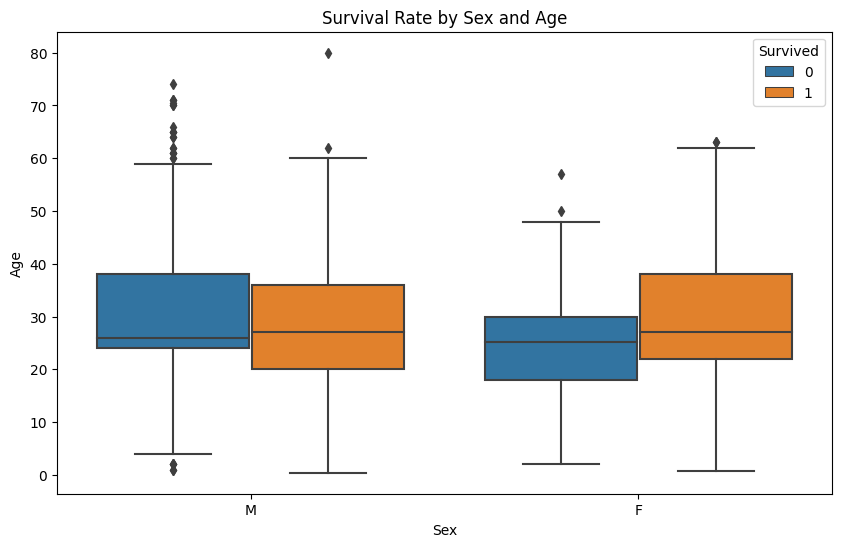

In [95]:
#14.Trực quan tỷ lệ sống sót theo giới tính và độ tuổi
def visualize_survival_by_sex_age(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
    plt.title('Survival Rate by Sex and Age')
    plt.show()

# Trực quan tỷ lệ sống sót theo giới tính và độ tuổi
visualize_survival_by_sex_age(df)

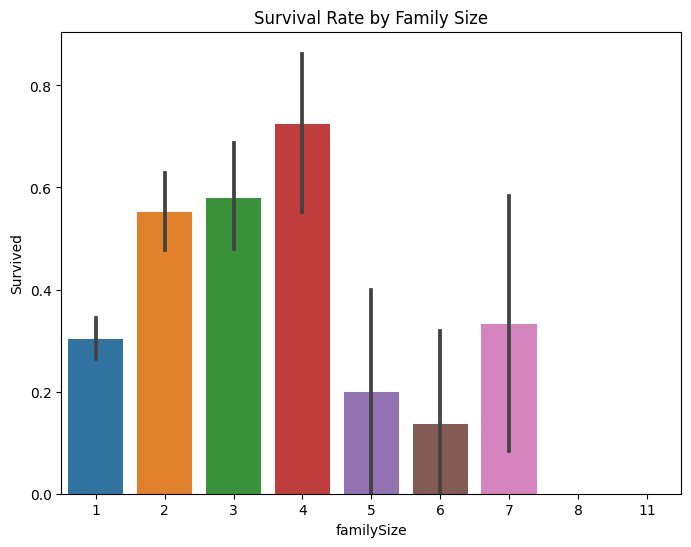

In [96]:
#15.Trực quan xác suất sống sót theo nhóm đi cùng (familySize)
def visualize_survival_by_family(df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='familySize', y='Survived', data=df)
    plt.title('Survival Rate by Family Size')
    plt.show()

# Trực quan tỷ lệ sống sót theo familySize
visualize_survival_by_family(df)

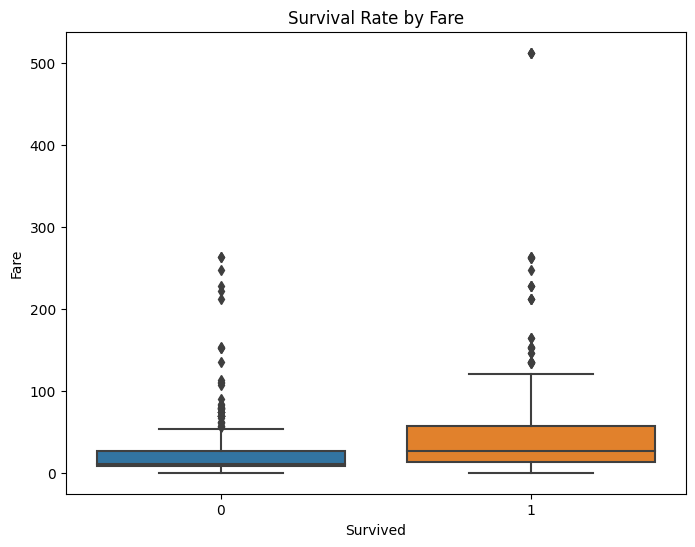

In [97]:
#16.Trực quan xác suất sống sót theo giá vé (Fare)
def visualize_survival_by_fare(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y='Fare', data=df)
    plt.title('Survival Rate by Fare')
    plt.show()

# Trực quan tỷ lệ sống sót theo Fare
visualize_survival_by_fare(df)

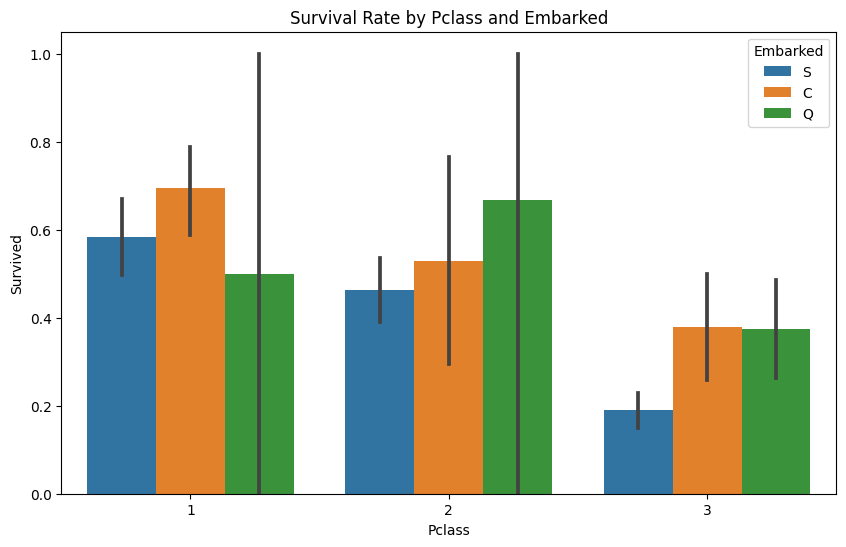

In [98]:
#17.Trực quan số lượng người sống sót và thiệt mạng theo Pclass và cảng sẽ cập bến (Embarked)
def visualize_survival_by_pclass_embarked(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=df)
    plt.title('Survival Rate by Pclass and Embarked')
    plt.show()

# Trực quan tỷ lệ sống sót theo Pclass và Embarked
visualize_survival_by_pclass_embarked(df)